# <span style="color:darkblue"> QTM 151 - Quiz 2 </span>

## Try to submit as an HTML file

<font size="5"> 

Print your name below

In [1]:
# Write your answer here
print("Jaeyu Hwang")


Jaeyu Hwang


<font size = "5" >
This quiz is open book 

- You can use the lecture notes
- You will get partial credit for attempting the questions
- To get full credit, the code should run as intended
- You should <span style="color:red"> NOT </span> communicate with other students

Print the following message: <br>

"I will abide by Emory's code of conduct"


In [2]:
# Write your answer here:
print("I will abide by Emory's code of conduct")




I will abide by Emory's code of conduct


<font size = "5">

Import the libraries "numpy", "matplotlib.pyplot", and "pandas"

In [3]:
# Write your answer here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<font size = "5">

Import the dataset "data_quiz/fifa23_players_basic.csv"

- It's a dataset on professional soccer players
- Rows correspond to players (18,539)
- Columns contain attributes of players (32)
- Try to view the dataset before starting

In [4]:
# Write your own code
dataset = pd.read_csv("data_quiz/fifa23_players_basic.csv")




<font size = "5">

(a) Create a function and apply it to a column <br>

<font size = "3">

Step 1:
- Define a function with a parameter "country"
- If "country == United States", status = "US national"
- Otherwise, status = "Not a US national"
- The function returns "status"

Step 2:
- Extract the column "Nationality" in the dataset <br>
(be carefeful to write the "N" (capitalized)
- Create a new variable called "is_us_national" <br>
to assign each player to the correct nationality

HINT: Use the ".apply()" function

In [5]:
# Write your own code
def fn_country(country):
    if country == "United States":
        status = "US national"
    else:
        status = "Not a US national"
    return(status)

data_nationality = dataset["Nationality"]
dataset["is_us_national"] = data_nationality.apply(fn_country)




<font size = "5">

(b) Use queries + global variables

<font size = "3">

- Compute the median of the column "Value(in Euro)" <br>
and store it as a variable
- Subset the players whose value is above the mean value <br>
  using ".query()"


HINT: Remember that there is a special syntax for <br>
when the column names have spaces (see Lecture 10) <br>
Reference the column as ``` `Wage(in Euro)`    ``` inside .query()

In [6]:
# Write your own code
value_median = dataset["Value(in Euro)"].median()

data_median_value = dataset.query("`Value(in Euro)` > @value_median")




<font size = "5">

(c) Use sorting + ".iloc[]"

<font size = "3">

- Use ".sort_values()" to order the "Potental" column <br>
from highest to lowest
- Get a subset with the 15 players with the highest potential

In [7]:
# Write your own code
data_descending_potential = dataset.sort_values(by = "Potential", ascending = False)
potential_top15 = data_descending_potential.iloc[:15,:]




<font size = "5">

(d) Create a function with five inputs $f(y,x,b0,b1,b2)$

<font size = "3">

$\qquad e = y - b_0 - b_1 * x - b_2 * x^2 $ <br>
$\qquad e2 = e^2$

- The function should return the mean of e2
- This is the mean-square error (mse)
- Call the function "fn_mse"
- Let $y$ be the column "Potential"
- Let $x$ be the column "Age" 
- Does <br>
$\qquad (b_0 = 90, b_1 = -1, b2 = -50)$ or <br>
$\qquad (b_0 = 90, b_1 = -1, b2 = 0)$ or <br>
$\qquad (b_0 = 90, b_1 = -1, b3 = 50)$ <br>
produce the lowest value of mse?


In [12]:
# Write your own code
def fn_mse(y,x,b0,b1,b2):
    e = y-b0-b1*x-b2*x**2
    e2 = e**2
    return(e2.mean())

a1 = fn_mse(y=dataset["Potential"], x=dataset["Age"], b0=90, b1=-1,b2=-50)

a2 = fn_mse(y=dataset["Potential"], x=dataset["Age"], b0=90, b1=-1,b2=0)#This produces the lowest value of mse

a3 = fn_mse(y=dataset["Potential"], x=dataset["Age"], b0=90, b1=-1,b2=50)


<font size = "5">

(e) Split a dataset into subsets

<font size = "3">

- Create ``` list_status = [0,1]```
- Create ``` list_prob = [0.5, 0.5]```
- Create a new variable $n$ with the number of rows of the dataset
- Use 
```python
    np.random.choice(list_status,
                     size = n,
                     p = list_prob)
```
$\qquad$ to create a new column called "status" <br>
$\qquad$ which randomly assigns each row to "0" with probability 50% <br>
$\qquad$ and to 1 with probability 50%
- Use .query() to subset all observations with status == 0.<br>
store it in a new dataset called "data0"
- Use .query() to subset all observations with status == 1.<br>
store it in a new dataset called "data1"



In [11]:
# Write your own code

list_status = [0,1]
list_prob = [0.5,0.5]
n = len(dataset)
dataset["status"] = np.random.choice(list_status, size = n, p = list_prob)
data0 = dataset.query("status == 0")
data1 = dataset.query("status == 1")


<font size = "5">

(f) Create two overlapping histogram plots

<font size = "3">

- This function requires the two datasets you created in (e)
- Display the distribution of "Overall" for "data0" and "data1"
- Use the "alpha" option to make the graphs semitransparent
- You will need to add a legend, label the axes, and the title

Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

Text(0.5, 0, 'Overall')

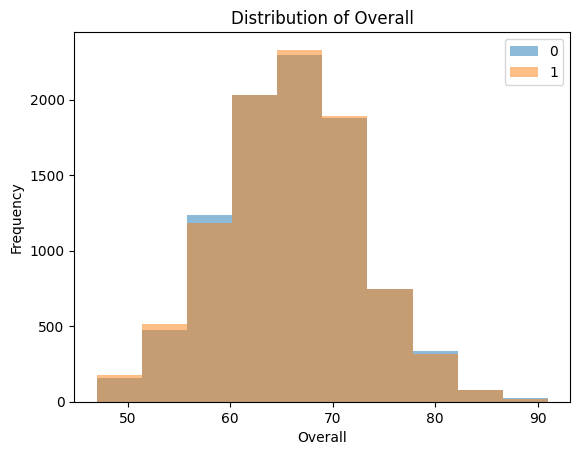

In [10]:
list_unique_status = pd.unique(dataset["status"])

for status in list_unique_status:
    temporarydataframe = dataset.query("status == @status")
    plt.hist(temporarydataframe["Overall"],alpha = 0.5)

plt.legend(labels = list_unique_status)
plt.title("Distribution of Overall")
plt.ylabel("Frequency")
plt.xlabel("Overall")


